# Notebook 1

In [1]:
# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
games_df   = pd.read_csv('../data/games.csv')
plays_df   = pd.read_csv('../data/plays.csv')
pff_df     = pd.read_csv('../data/PFFScoutingData.csv')
track_2018 = pd.read_csv('../data/tracking2018.csv')
# track_2019 = pd.read_csv('./data/tracking2019.csv')
# track_2020 = pd.read_csv('./data/tracking2020.csv')

In [14]:
#Each tracking data csv is around 1.6 - 1.75 GBs as such I have only loaded them in one at a time.

## Check for Nulls

In [7]:
games_df.isna().sum()

gameId             0
season             0
week               0
gameDate           0
gameTimeEastern    0
homeTeamAbbr       0
visitorTeamAbbr    0
dtype: int64

In [5]:
games_df.shape

(764, 7)

In [8]:
plays_df.isna().sum()

gameId                        0
playId                        0
playDescription               0
quarter                       0
down                          0
yardsToGo                     0
possessionTeam                0
specialTeamsPlayType          0
specialTeamsResult            0
kickerId                    101
returnerId                13041
kickBlockerId             19879
yardlineSide                166
yardlineNumber                0
gameClock                     0
penaltyCodes              18877
penaltyJerseyNumbers      18877
penaltyYards              18877
preSnapHomeScore              0
preSnapVisitorScore           0
passResult                19934
kickLength                 3652
kickReturnYardage         14655
playResult                    0
absoluteYardlineNumber        0
dtype: int64

In [11]:
plays_df.shape

(19979, 25)

In [9]:
pff_df.isna().sum()

gameId                         0
playId                         0
snapDetail                 14060
snapTime                   14061
operationTime              14061
hangTime                    6881
kickType                    6256
kickDirectionIntended       6278
kickDirectionActual         6278
returnDirectionIntended    15225
returnDirectionActual      15223
missedTackler              18631
assistTackler              18945
tackler                    15220
kickoffReturnFormation     12136
gunners                    14078
puntRushers                16969
specialTeamsSafeties        4042
vises                      14101
kickContactType            14100
dtype: int64

In [12]:
pff_df.shape

(19979, 20)

In [10]:
track_2018.isna().sum()

time                  0
x                     0
y                     0
s                     0
a                     0
dis                   0
o                555537
dir              555537
event                 0
nflId            555537
displayName           0
jerseyNumber     555537
position         555537
team                  0
frameId               0
gameId                0
playId                0
playDirection         0
dtype: int64

In [13]:
track_2018.shape

(12777351, 18)

## Breaking the data into subsets for punts and kickoffs

In [15]:
plays_df['specialTeamsPlayType'].value_counts()

Kickoff        7843
Punt           5991
Extra Point    3488
Field Goal     2657
Name: specialTeamsPlayType, dtype: int64

In [16]:
#We have ~13.8K plays that fall under our investigation (Punt or Kickoff)
plays_df[(plays_df['specialTeamsPlayType'] == 'Kickoff') | (plays_df['specialTeamsPlayType'] == 'Punt')].shape

(13834, 25)

In [17]:
punt_plays_df = plays_df[plays_df['specialTeamsPlayType'] == 'Punt']
punt_plays_df.head(2)

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
1,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Ce...",1,4,4,PHI,Punt,Return,45603.0,...,UNSd,PHI 18,-15.0,0,0,NaN,56.0,5.0,36,18
4,2018090600,872,"(:33) C.Johnston punts 65 yards to end zone, C...",1,4,18,PHI,Punt,Touchback,45603.0,...,NaN,NaN,NaN,0,3,NaN,65.0,NaN,45,45


In [18]:
kickoff_plays_df = plays_df[plays_df['specialTeamsPlayType'] == 'Kickoff']
kickoff_plays_df.head(2)

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
0,2018090600,37,J.Elliott kicks 65 yards from PHI 35 to end zo...,1,0,0,PHI,Kickoff,Touchback,44966.0,...,NaN,NaN,NaN,0,0,NaN,66.0,NaN,40,45
3,2018090600,677,M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...,1,0,0,ATL,Kickoff,Return,37267.0,...,NaN,NaN,NaN,0,3,NaN,64.0,30.0,34,75


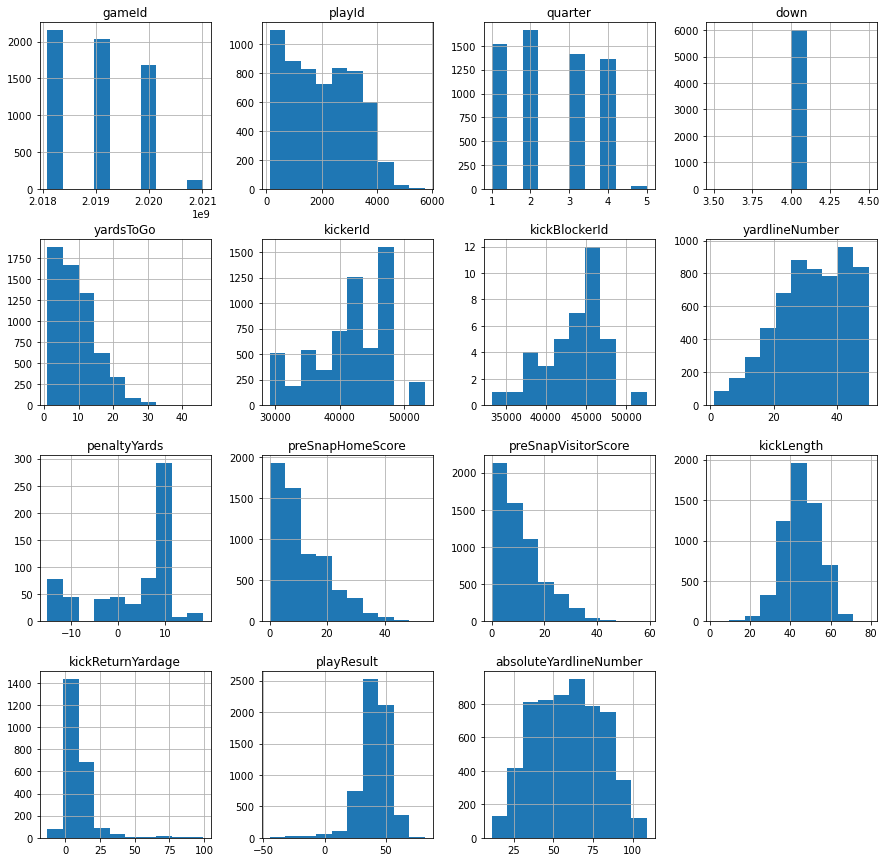

In [13]:
#Lets examine the Punt plays distributions
punt_plays_df.hist(figsize=(15, 15));

''

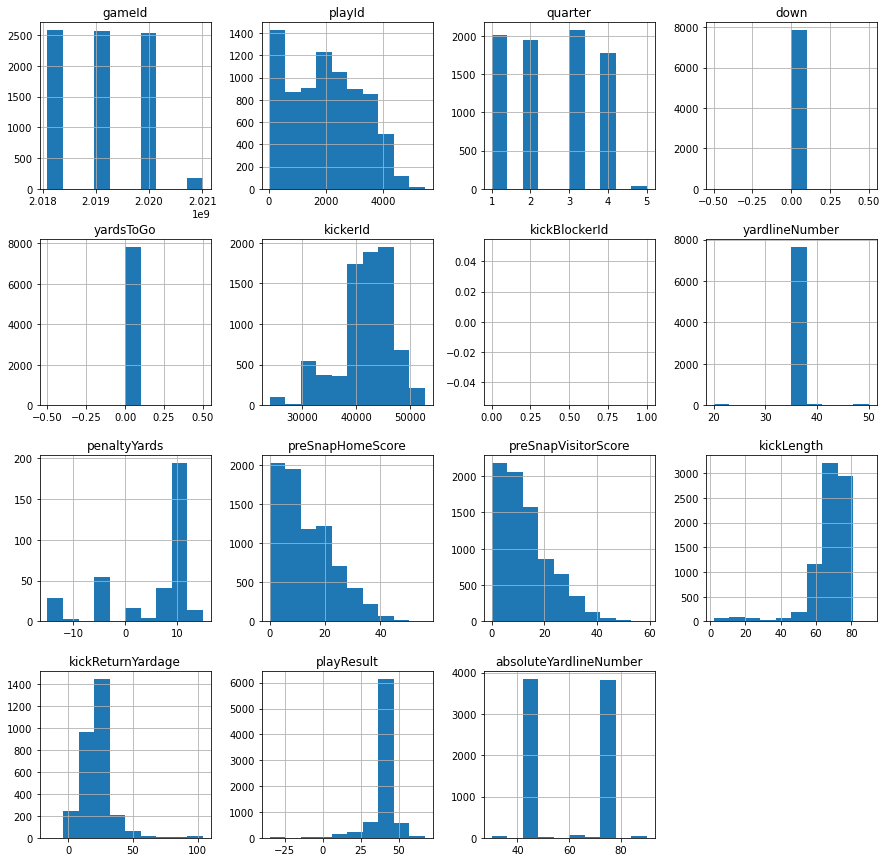

In [14]:
#Lets examine the Kickoff plays distributions
kickoff_plays_df.hist(figsize=(15,15));

In [28]:
punt_plays_df = pd.merge(left=punt_plays_df, right=pff_df)
punt_plays_df.head(2)

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,returnDirectionActual,missedTackler,assistTackler,tackler,kickoffReturnFormation,gunners,puntRushers,specialTeamsSafeties,vises,kickContactType
0,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Ce...",1,4,4,PHI,Punt,Return,45603.0,...,R,PHI 57,NaN,PHI 54,NaN,PHI 18; PHI 29,NaN,NaN,ATL 83; ATL 27; ATL 34; ATL 21,CC
1,2018090600,872,"(:33) C.Johnston punts 65 yards to end zone, C...",1,4,18,PHI,Punt,Touchback,45603.0,...,NaN,NaN,NaN,NaN,NaN,PHI 18; PHI 29,ATL 85,ATL 37,ATL 83; ATL 34; ATL 21,BF


In [30]:
kickoff_plays_df = pd.merge(left=kickoff_plays_df, right=pff_df)
kickoff_plays_df.head(2)

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,returnDirectionActual,missedTackler,assistTackler,tackler,kickoffReturnFormation,gunners,puntRushers,specialTeamsSafeties,vises,kickContactType
0,2018090600,37,J.Elliott kicks 65 yards from PHI 35 to end zo...,1,0,0,PHI,Kickoff,Touchback,44966.0,...,NaN,NaN,NaN,NaN,8-0-2,NaN,NaN,PHI 23; PHI 27,NaN,NaN
1,2018090600,677,M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...,1,0,0,ATL,Kickoff,Return,37267.0,...,C,ATL 83,ATL 22,ATL 27,8-0-2,NaN,NaN,ATL 17; ATL 22,NaN,NaN


In [33]:
#Going to begin by just using the pff and plays datasets to build a minimum viable product on and then look to expand that with tracking data if time allows.

In [36]:
#creating new csvs for use throughout project
# kickoff_plays_df.to_csv('../data/kickoff_plays.csv', index=False)
punt_plays_df.to_csv('../data/punt_plays.csv', index=False)